In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [4]:
np.random.seed(42)

n_samples = 2000

retailers = np.random.choice(['M&S', 'John Lewis'], n_samples)

age = np.random.randint(18, 75, n_samples)

gender = np.random.choice(['Male', 'Female'], n_samples)

income = np.random.normal(40000, 15000, n_samples).astype(int)

sales = np.random.normal(120, 50, n_samples).clip(10, 500)

profit_margin = np.random.normal(0.11, 0.04, n_samples).clip(0.02, 0.25)

locations = np.random.choice(['London', 'Manchester', 'Birmingham', 'Glasgow'], n_samples)

data = pd.DataFrame({
    'Retailer': retailers,
    'Age': age,
    'Gender': gender,
    'Income': income,
    'Sales': sales,
    'ProfitMargin': profit_margin,
    'Location': locations
})

data.head()


,Retailer,Age,Gender,Income,Sales,ProfitMargin,Location
0,M&S,64,Female,38992,177.483601,0.066064,Manchester
1,John Lewis,29,Male,29263,134.828847,0.085235,Manchester
2,M&S,33,Male,50230,183.382576,0.049739,Manchester
3,M&S,41,Male,62308,134.436400,0.069828,London
4,M&S,36,Male,31299,62.144169,0.062721,Manchester


In [5]:
le_gender = LabelEncoder()
le_location = LabelEncoder()
le_retailer = LabelEncoder()

data['Gender'] = le_gender.fit_transform(data['Gender'])
data['Location'] = le_location.fit_transform(data['Location'])
data['Retailer'] = le_retailer.fit_transform(data['Retailer'])

data.head()


,Retailer,Age,Gender,Income,Sales,ProfitMargin,Location
0,1,64,0,38992,177.483601,0.066064,3
1,0,29,1,29263,134.828847,0.085235,3
2,1,33,1,50230,183.382576,0.049739,3
3,1,41,1,62308,134.436400,0.069828,2
4,1,36,1,31299,62.144169,0.062721,3


In [6]:
features = ['Age', 'Income', 'Sales', 'ProfitMargin']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

scaled_df = pd.DataFrame(scaled_features, columns=features)
scaled_df.head()


,Age,Income,Sales,ProfitMargin
0,1.126692,-0.040577,1.183688,-1.069737
1,-1.024364,-0.681211,0.319150,-0.604357
2,-0.778529,0.699421,1.303250,-1.466013
3,-0.286859,1.494731,0.311195,-0.978349
4,-0.594152,-0.547145,-1.154044,-1.150885


In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)

data['Cluster'] = kmeans.fit_predict(scaled_features)

data.head()


,Retailer,Age,Gender,Income,Sales,ProfitMargin,Location,Cluster
0,1,64,0,38992,177.483601,0.066064,3,0
1,0,29,1,29263,134.828847,0.085235,3,2
2,1,33,1,50230,183.382576,0.049739,3,1
3,1,41,1,62308,134.436400,0.069828,2,1
4,1,36,1,31299,62.144169,0.062721,3,2


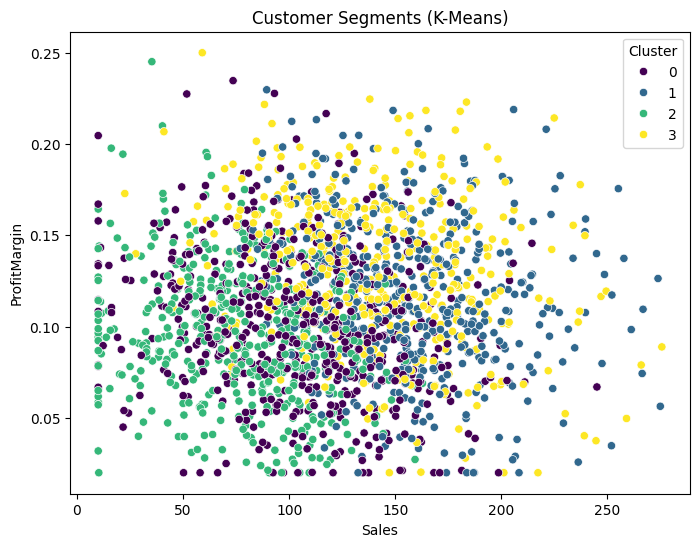

In [8]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x=data['Sales'],
    y=data['ProfitMargin'],
    hue=data['Cluster'],
    palette='viridis'
)

plt.title("Customer Segments (K-Means)")
plt.show()


In [9]:
X = data[['Age', 'Income', 'Sales', 'Gender', 'Location', 'Retailer']]
y = data['ProfitMargin']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(
    optimizer='adam',
    loss='mse'
)

model.summary()


/Users/adnanaltimeemy/miniconda3/envs/coding/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/50


In [ ]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Training vs Validation Loss")
plt.legend(['Train', 'Validation'])
plt.show()


In [ ]:
cluster_analysis = data.groupby(['Retailer', 'Cluster']).mean()

cluster_analysis


In [ ]:
data.to_csv("ms_johnlewis_retail_dataset.csv", index=False)
